# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [112]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [114]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [115]:
# Create a Beautiful Soup Object
html = browser.html

# Create a BeautifulSoup object to parse the HTML content
soup = soup(html, 'html.parser')


In [116]:
# Extract all rows of data
# Find the table in the HTML using the appropriate tag and class
table = soup.find('table', class_='table')

# Check if the table was found before proceeding
if table is not None:
    # Extract the data from the table
    data = []
    for row in table.find_all('tr'):
        row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
        data.append(row_data)
else:
    print("Table with class 'table' not found on the webpage.")

# Display the extracted data
for row in data:
    print(row)

    

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [117]:
# Create an empty list to store the rows
rows_list = []

# Define the column headings
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    if len(row_data) == len(columns):  # Ensure the row has the correct number of columns
        rows_list.append(row_data)

# Display the list of rows
for row in rows_list:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [118]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(rows_list, columns=columns)


In [119]:
# Confirm DataFrame was created successfully
# Display the Pandas DataFrame
print(mars_df)

        id  terrestrial_date   sol   ls  month  min_temp  pressure
0       id  terrestrial_date   sol   ls  month  min_temp  pressure
1        2        2012-08-16    10  155      6     -75.0     739.0
2       13        2012-08-17    11  156      6     -76.0     740.0
3       24        2012-08-18    12  156      6     -76.0     741.0
4       35        2012-08-19    13  157      6     -74.0     732.0
...    ...               ...   ...  ...    ...       ...       ...
1863  1889        2018-02-23  1973  133      5     -78.0     730.0
1864  1892        2018-02-24  1974  134      5     -77.0     729.0
1865  1894        2018-02-25  1975  134      5     -76.0     729.0
1866  1893        2018-02-26  1976  135      5     -77.0     728.0
1867  1895        2018-02-27  1977  135      5     -77.0     727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [123]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [137]:

# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(float)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [138]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [149]:
# 1. How many months are there on Mars?
# Extract unique values from the 'month' column
unique_months = mars_df['month'].unique()

# Count the number of unique months
num_months = len(unique_months)

# Display the number of months on Mars
print(f"The number of months on Mars is: {num_months}")

The number of months on Mars is: 12


In [169]:
# 2. How many Martian days' worth of data are there?
# Calculate the range of sols (Martian days) in the dataset
min_sol = mars_df['sol'].min()
max_sol = mars_df['sol'].max()

# Calculate the number of Martian days' worth of data
num_sols = max_sol - min_sol + 1  # Adding 1 to include the last sol

# Display the number of Martian days' worth of data
print(f"The dataset covers {num_sols} Martian days' worth of data.")

The dataset covers 1968 Martian days' worth of data.


In [170]:
# 3. What is the average low temperature by month?
# Convert 'min_temp' column to numeric if it's not already
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce')

# Group the data by 'month' and calculate the average low temperature for each month
average_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Display the average low temperature by month
print("Average Low Temperature by Month:")
print(average_low_temp_by_month)

Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


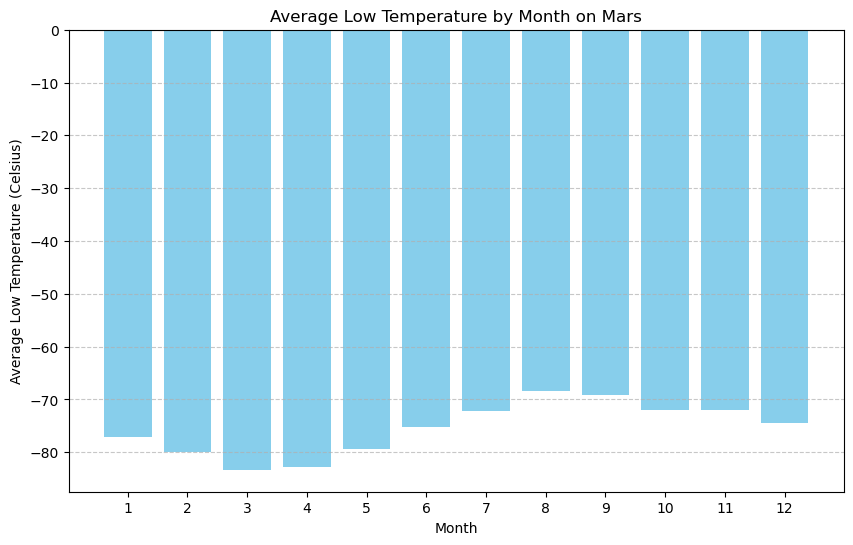

In [171]:
# Plot the average temperature by month
# Create a bar plot for the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_low_temp_by_month.index, average_low_temp_by_month, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.title('Average Low Temperature by Month on Mars')
plt.xticks(average_low_temp_by_month.index)  # Set x-axis ticks to be the months
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [178]:
# Identify the coldest and hottest months in Curiosity's location
# Find the coldest month (lowest average low temperature)
coldest_month = average_low_temp_by_month.idxmin()

# Find the hottest month (highest average low temperature)
hottest_month = average_low_temp_by_month.idxmax()

# Display the coldest and hottest months
print(f"The coldest month in Curiosity's location is: {coldest_month}")
print(f"The hottest month in Curiosity's location is: {hottest_month}")


The coldest month in Curiosity's location is: 3
The hottest month in Curiosity's location is: 8


In [184]:
# 4. Average pressure by Martian month
# Convert 'pressure' column to numeric if it's not already
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce')

# Group the data by 'month' and calculate the average pressure for each month
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Display the average pressure by Martian month
print("Average Pressure by Martian Month:")
print(average_pressure_by_month)

Average Pressure by Martian Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


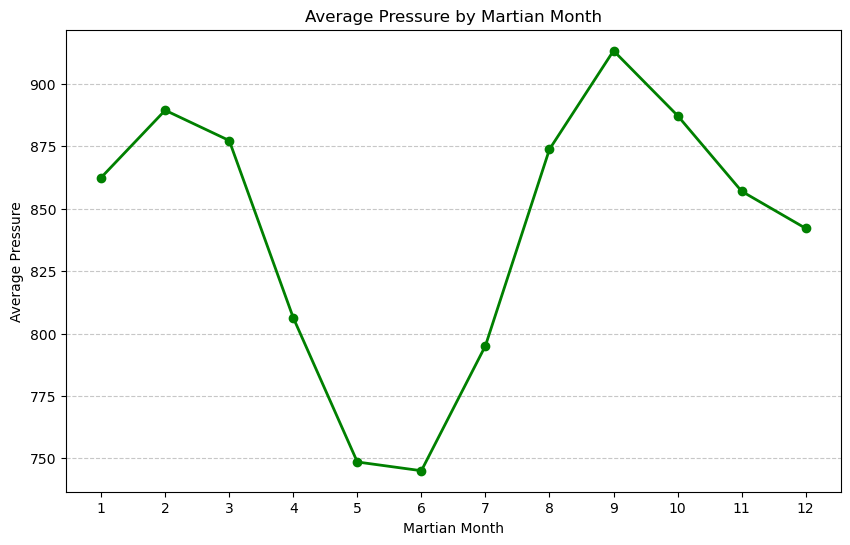

In [189]:
# Plot the average pressure by month
# Create a line plot for the average pressure by month
plt.figure(figsize=(10, 6))
plt.plot(average_pressure_by_month.index, average_pressure_by_month, marker='o', color='green', linestyle='-', linewidth=2)
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Martian Month')
plt.xticks(average_pressure_by_month.index)  # Set x-axis ticks to be the Martian months
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [193]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Define the length of a Martian year in sols
martian_year_in_sols = 687

# Define the conversion factor between Martian days and Earth days
conversion_factor = 1.0275  # Approximately 1.0275 Earth days in a Martian day

# Calculate the number of Earth days in a Martian year
earth_days_in_martian_year = martian_year_in_sols * conversion_factor

# Display the result
print(f"There are approximately {earth_days_in_martian_year} terrestrial (Earth) days in a Martian year.")


There are approximately 705.8925 terrestrial (Earth) days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [196]:
# Write the data to a CSV
# Define the file path where you want to save the CSV file
file_path = 'mars_data.csv'

# Write the data from the DataFrame to a CSV file
mars_df.to_csv(file_path, index=False)

print(f"Data successfully written to {file_path}")

Data successfully written to mars_data.csv


In [197]:
browser.quit()